In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [2]:
df_files = os.listdir('../../data/DataGithub/')
df_files

['code_etablissement.csv',
 'Effectifs_ecoles.csv',
 'fetes_chretiennes.csv',
 'fetes_juives.csv',
 'fetes_musulmanes.csv',
 'frequentation_cantines_v3.csv',
 'incidence RDD 3.csv',
 'incidence RDD 6.csv',
 'incidence RDD 7.csv',
 'Journees_de_greve.csv',
 'jours-feries-seuls.csv',
 'key_jours.xlsx',
 'Liste ETS_geo_AE12102020.xlsx',
 'menus_2011-2015.csv',
 'menus_2016-2019.csv',
 'missing_strikes.xlsx',
 'mouvements-sociaux-depuis-2002.csv',
 'mouvements-sociaux-depuis-2002.json',
 'orga_des_etablissements.xlsx',
 'ramadan.csv',
 'vacances_Nantes_2011-2019.csv']

In [3]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957


In [4]:
df['datetime']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))

In [5]:
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05


In [6]:
df_calend=df.datetime.unique()

In [7]:
df_calend.shape

(1520,)

In [8]:
df_calend = np.sort(df_calend)

In [9]:
df_calend

array(['2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2022-05-17T00:00:00.000000000', '2022-05-19T00:00:00.000000000',
       '2022-05-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
df_calend.reshape(-1,1)

array([['2011-01-03T00:00:00.000000000'],
       ['2011-01-04T00:00:00.000000000'],
       ['2011-01-06T00:00:00.000000000'],
       ...,
       ['2022-05-17T00:00:00.000000000'],
       ['2022-05-19T00:00:00.000000000'],
       ['2022-05-20T00:00:00.000000000']], dtype='datetime64[ns]')

In [11]:
df_ponts=[[df_calend[i],int(min(abs(df_calend[i]-df_calend[i-1]),abs(df_calend[i+1]-df_calend[i]))/np.timedelta64(1, "D")-1)] for i in range(1,len(df_calend)-1) ]

In [12]:
df_ponts=pd.DataFrame(df_ponts)
df_ponts.rename(columns={0: 'datetime', 1: 'datelag'}, inplace=True)

In [13]:
df_ponts.head()

,datetime,datelag
0,2011-01-04,0
1,2011-01-06,0
2,2011-01-07,0
3,2011-01-10,0
4,2011-01-11,0


In [14]:
df=pd.merge(df, df_ponts, how='left', on='datetime')

In [15]:
df['datelag'].fillna(0, inplace=True)

In [16]:
df['joursem']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").weekday())
df['isoweek']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").isocalendar().week)

In [17]:
df.sort_values(by='datelag', ascending=False).head(50)

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,datelag,joursem,isoweek
50581,51945,M/E,2021-04-09,75.0,75.0,LE BAUT,2021,170.0,0.441176,2021-04-09,6.0,4,14
28148,28774,M/E,2021-04-09,90.0,90.0,EMILE PEHANT,2021,263.0,0.342205,2021-04-09,6.0,4,14
50583,51947,E,2021-04-09,30.0,30.0,JEAN JAURES,2021,110.0,0.272727,2021-04-09,6.0,4,14
111816,114573,E,2021-04-09,90.0,50.0,BOCCAGE E,2021,129.5,0.386100,2021-04-09,6.0,4,14
50582,51946,E,2021-04-09,70.0,70.0,MUTUALITE,2021,334.0,0.209581,2021-04-09,6.0,4,14
91979,94242,M,2021-04-09,0.0,40.0,BOCCAGE M,2021,74.0,0.540541,2021-04-09,6.0,4,14
50580,51944,M/E,2021-04-09,50.0,60.0,LINOT,2021,299.5,0.200334,2021-04-09,6.0,4,14
91980,94243,M/E,2021-04-09,70.0,70.0,ALPHONSE BRAUD,2021,156.0,0.448718,2021-04-09,6.0,4,14
37868,38869,M/E,2021-04-09,70.0,70.0,CONTRIE,2021,73.0,0.958904,2021-04-09,6.0,4,14
50584,51948,M/E,2021-04-09,75.0,75.0,BOTTIERE,2021,176.0,0.426136,2021-04-09,6.0,4,14


<AxesSubplot:xlabel='datelag'>

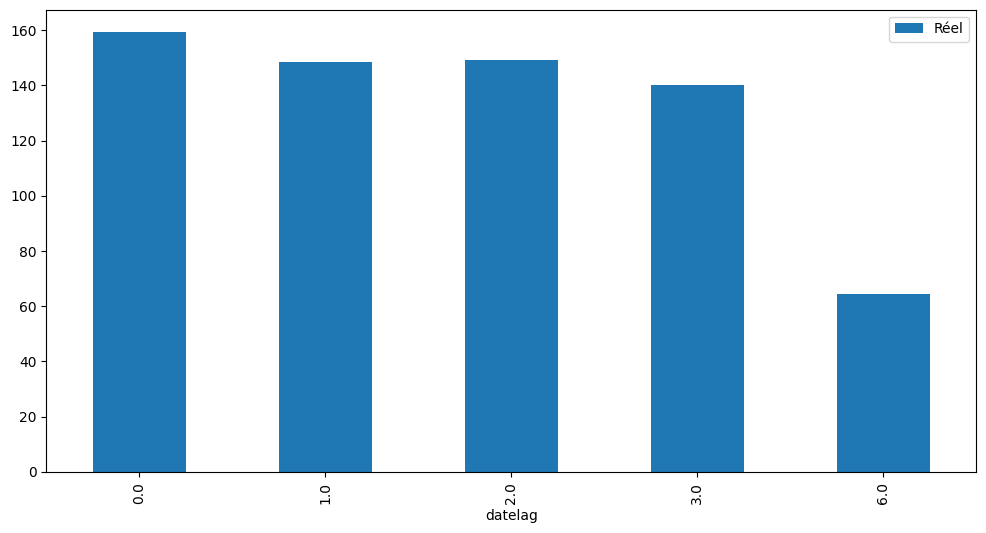

In [18]:
df[['datelag','Réel']].groupby('datelag').mean().plot(kind='bar', figsize=(12,6))

In [19]:
df[['datelag','Réel']].groupby('datelag').count()

,Réel
datelag,
0.0,121404
1.0,2525
2.0,2972
3.0,257
6.0,11


In [23]:
df[df.datelag>0].joursem.value_counts()

1    2164
4    1579
0    1405
3     529
2      88
Name: joursem, dtype: int64

In [24]:
df[df.datelag>0].Date.value_counts()

2012-05-07    89
2016-03-29    88
2014-02-25    88
2016-03-25    88
2014-11-10    88
              ..
2020-06-02    72
2018-05-22    29
2021-04-09    11
2020-05-07     2
2020-05-05     1
Name: Date, Length: 70, dtype: int64

In [25]:
df[df.datelag>0].Date.value_counts().shape

(70,)